In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
comcast_data = pd.read_csv("C:\\Users\\Sakina\\Desktop\\Data Science with Python (Simplilearn)\DATA SETS\\Comcast_telecom_complaints_data.csv")

In [5]:
comcast_data   # prints first 5 rows and last 5 rows


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [26]:
type(comcast_data)

pandas.core.frame.DataFrame

In [27]:
comcast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [8]:
comcast_data.shape

(2224, 11)

In [28]:
comcast_data.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [8]:
# NOTE -- all are Object datatype except Zip code

In [9]:
# QUESTION 1- Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [29]:
# To convert the dateindex column which is created into date-time format
# PANDAS ALREADY PROVIDES DATE TIME LIBRARY

comcast_data['Date_month_year'] = comcast_data['Date_month_year'].apply(pd.to_datetime)
comcast_data.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [30]:
# Setting 'Date_month_year' as index
comcast_data = comcast_data.set_index('Date_month_year')


Text(0.5, 1.0, 'MONTHLY TREND CHART')

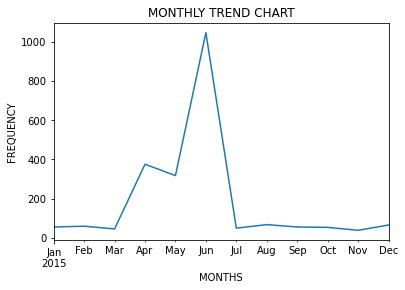

In [31]:
# dataframe.groupby() function to split the data into groups according to frequency

months = comcast_data.groupby(pd.Grouper(freq='M')).size().plot()
plt.xlabel("MONTHS")
plt.ylabel("FREQUENCY")
plt.title("MONTHLY TREND CHART")


Text(0.5, 1.0, 'DAILY TREND CHART')

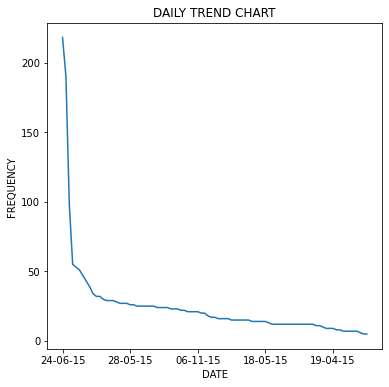

In [32]:
# To plot chart for daily complaints

comcast_data = comcast_data.sort_values(by = 'Date')
plt.figure(figsize=(6,6))
comcast_data['Date'].value_counts().plot()
plt.xlabel("DATE")
plt.ylabel("FREQUENCY")
plt.title("DAILY TREND CHART")

In [33]:
# Q2 -- Create a new categorical variable with value as Open and Closed. 
Open and Pending is to be categorized as Open AND
Closed and Solved is to be categorized as Closed

SyntaxError: invalid syntax (<ipython-input-33-605eafd6f4f9>, line 2)

In [34]:
comcast_data.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [35]:
# Assigning to a new column

comcast_data["Status_new"] = ["Open" if (status=="Open" or status=="Pending") else "Closed" for status in comcast_data["Status"]]

In [ ]:
comcast_data.head()

In [ ]:
# QUESTION 3

In [36]:
comcast_data.groupby(["State"]).size()

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

In [36]:
comcast_data.groupby(["State"]).size().sort_values(ascending=False).to_frame()  # to sort from highest to lowest and then to_frame to beautify the dataframe

,0
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


In [37]:
comcast_data.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index()

,State,0
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


In [23]:
# To rename heading of the column given as 0

comcast_data.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"Count of Complaints"}, axis=1)[:10]

,State,Count of Complaints
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


In [37]:
comcast_data.groupby(["State", "Status_new"]).size()

State          Status_new
Alabama        Closed        17
               Open           9
Arizona        Closed        14
               Open           6
Arkansas       Closed         6
                             ..
Virginia       Open          11
Washington     Closed        75
               Open          23
West Virginia  Closed         8
               Open           3
Length: 77, dtype: int64

In [38]:
# To separate Open and Closed

comcast_data.groupby(["State", "Status_new"]).size().unstack().fillna(0)
status_complaints = comcast_data.groupby(["State", "Status_new"]).size().unstack().fillna(0)
status_complaints

Status_new,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


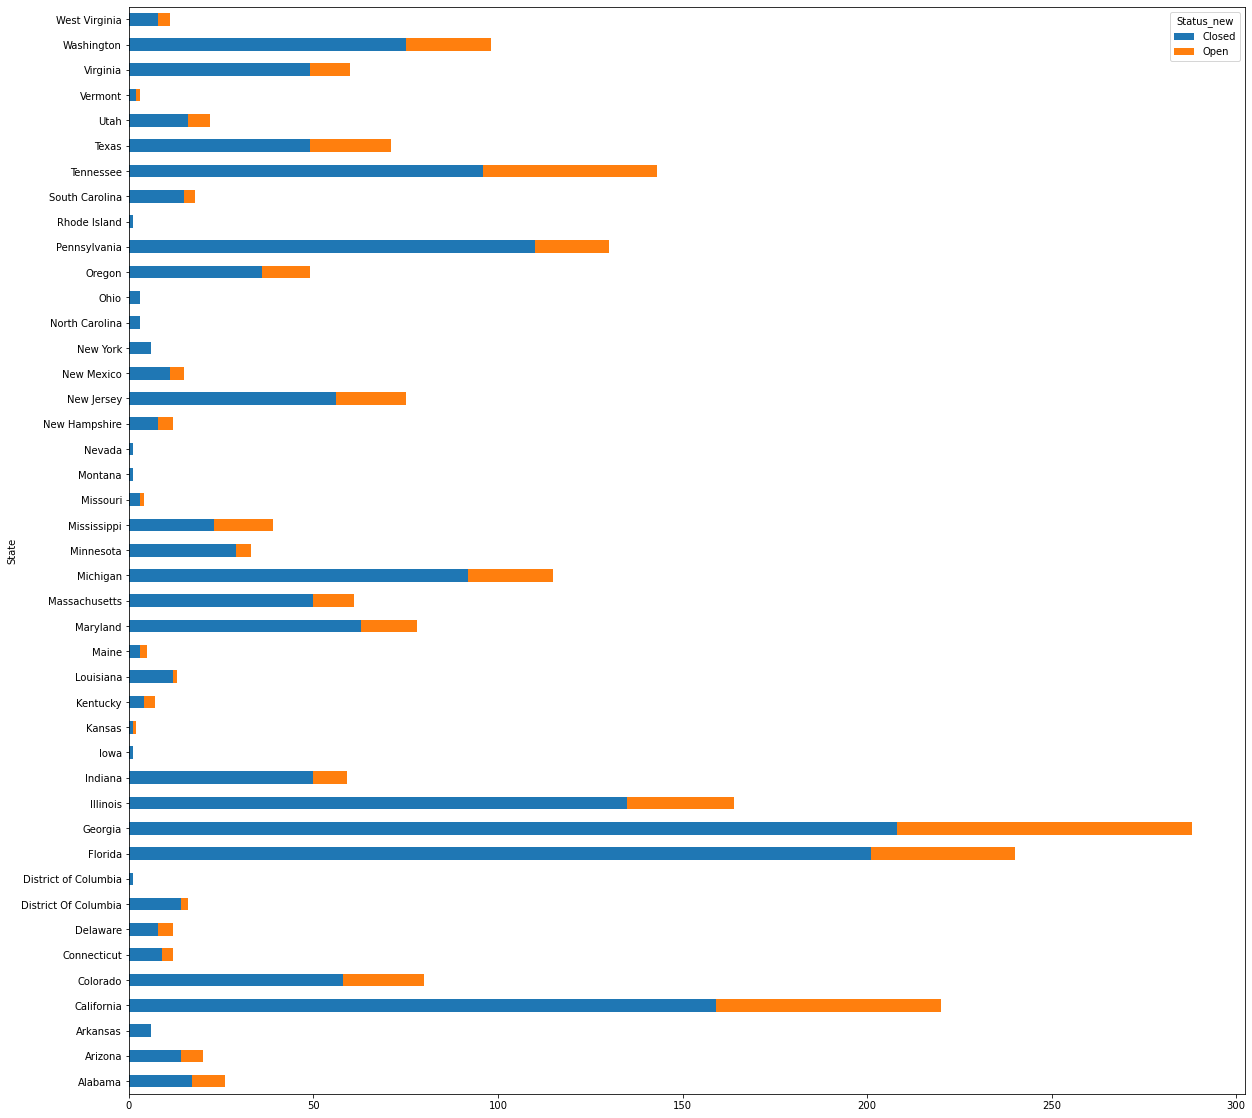

In [43]:
status_complaints.plot(kind='barh', figsize=(20,20), stacked = True)
plt.rcParams.update({"font.size":30})

In [ ]:
# Which state has the maximum complaints

In [44]:
comcast_data.groupby(["State"]).size().sort_values(ascending = False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

In [ ]:
Georgia has the maximum number of complaints

In [45]:
# Which state has the highest percentage of unresolved complaints

In [60]:
print(comcast_data["Status_new"].value_counts())

Closed    1707
Open       517
Name: Status_new, dtype: int64


In [67]:
unresolved  = comcast_data.groupby(["State","Status_new"]).size().unstack().fillna(0)
unresolved.sort_values('Closed',axis = 0,ascending = False)[:1]

Status_new,Closed,Open
State,,
Georgia,208.0,80.0


<AxesSubplot:xlabel='State'>

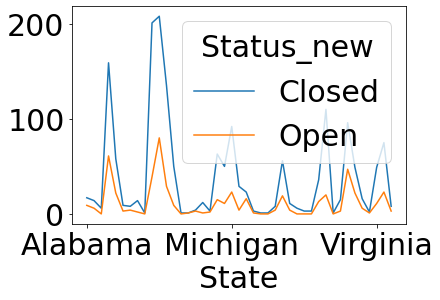

In [68]:
unresolved.plot()

In [72]:
CT['Resolved_complaint_%'] = CT['Closed']/CT['Closed'].sum()*100

CT['Unresolved_complaint_%'] = CT['Open']/CT['Open'].sum()*100

In [75]:
CT.sort_values('Unresolved_complaint_%',axis = 0,ascending=False)[:1]

Status_new,Closed,Open,Resolved_complaint_%,Unresolved_complaint_%
State,,,,
Georgia,208.0,80.0,12.18512,15.473888


In [74]:
cr = comcast_data.groupby(['Received Via','Status_new']).size().unstack().fillna(0)
cr['resolved'] = cr['Closed']/cr['Closed'].sum()*100
cr['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

In [ ]:
QUESTION 5

In [50]:
import nltk 
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [51]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = comcast_data['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops: 
    STOPWORDS.add(word)

In [20]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='grey',
                      width=2000,
                      height=2000).generate(common_complaints)

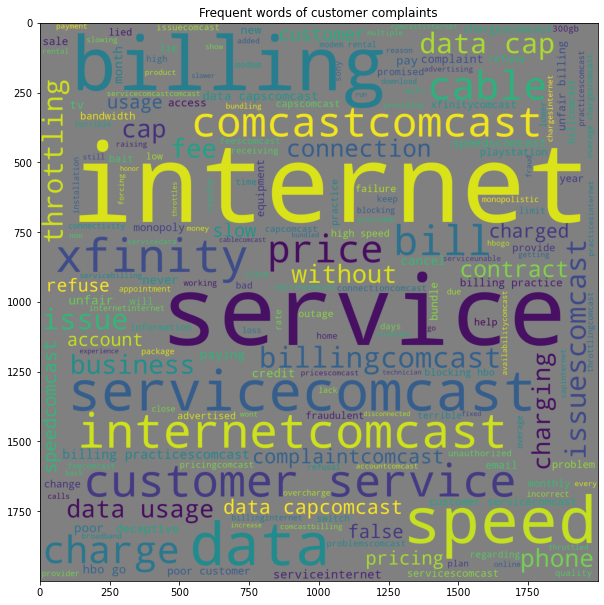

In [21]:
plt.figure(figsize =(10,12))
plt.imshow(wordcloud)
plt.title('Frequent words of customer complaints')
plt.axis('on')
plt.show()